In [1]:
# read the path file with python
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
# import tensorflow as tf
# import tensorflow.keras as keras
import math
# from scipy.optimize import fsolve
# from scipy.optimize import root
from scipy.optimize import minimize
from scipy import signal
from scipy import linalg
import scipy as scipy
# import scipy as scp
# import sympy as  syp
# from tensorflow.keras import backend as K
# from tensorflow.keras.layers import Layer
# from tensorflow.keras.models import Sequential
import gc
import struct

In [54]:
l=[]
a = []
h = []
del l,a,h
q = 0
with open("C:\\Users\\Administrator\\source\\data\\path.dat", "rb") as file0:
    data1 = file0.read(4)
    I = struct.unpack("i", data1)[0]
    data1 = file0.read(4)
    J = struct.unpack("i", data1)[0]
    data1 = file0.read(4)
    K = struct.unpack("i", data1)[0]
    h = []
    for i in range(I):
        a = []
        for j in range(J):
            l = []
            while(1):
                data1 = file0.read(4)
                f = struct.unpack("4s",data1)[0]
                if (f!=b'end\x00'):
                    f = struct.unpack("f",data1)[0]
                    l.append(f)
                else:
                    break
            
            a.append(l)
        h.append(a)
            

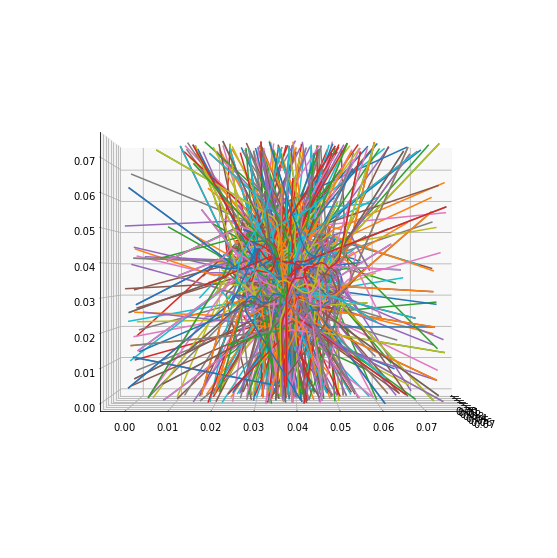

In [85]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
for i in range(I):
    # Data for a three-dimensional line
    zline = h[i][0]
    xline = h[i][1]
    yline = h[i][2]
    ax.view_init(0, 0)
    ax.plot3D(xline, yline, zline)


In [82]:
eye = [0.045,0.045,0.025]
#normal line vector (0.707,0.707,0)
#euqation of surface : x+y=0.09
N=150
time = np.linspace(1e-12, 2e-10, num=N)
weight = np.zeros((N,))
temp = pow(2,0.5)
threshold = 0.25
for i in range(I):
    for k in range(len(h[i][0])):
        
        if((pow(h[i][0][k]-eye[0],2)+pow(h[i][1][k]-eye[1],2)
           +pow(h[i][2][k]-eye[2],2) < pow(0.05*threshold,2)) and 
           (abs(h[i][0][k]+h[i][1][k] - 0.09)/temp < 0.05*threshold)):
            
            for t in range(N):
                if(h[i][4][k]>=time[t]and(h[i][4][k]<time[t+1])):
                    weight[t]=weight[t]+h[i][3][k]
            break;
            
        


In [83]:
weight


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19693603, 1.25390182, 5.09621638,
       8.2225983 , 4.0254861 , 1.04182112, 3.49713583, 0.68832874,
       0.68626827, 1.02427271, 0.34006184, 0.33904389, 0.82210608,
       0.50401238, 0.50250363, 0.6545143 , 0.        , 0.        ,
       0.33001825, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1610987 , 0.        , 0.        , 0.     

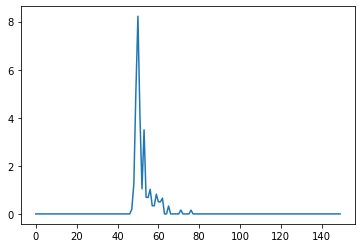

In [84]:
plt.plot(weight)
plt.show()